In [5]:
import cv2 
import matplotlib.pyplot as plt 
import collections
import numpy as np

In [48]:
first = lambda x : int(str(x)[0])
benford_prob = lambda x : np.log10(1 + 1/x)
divergence = lambda probs : sum([pow(probs[i]-benford_prob(i),2) for i in range(1,10)])

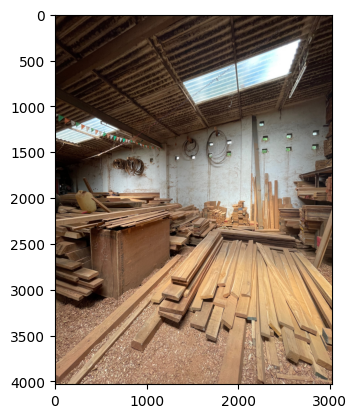

In [52]:
# Read an image 
img = cv2.imread('data/db/IMG_0026.jpeg')

# Convert to grayscale
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

In [54]:
h, w = img_rgb.shape[:2]
img_new = np.zeros((h, w, 3), np.uint8)

for i in range(h):
    for j in range(w):
        img_new[i,j] = [first(x) for x in img_rgb[i][j]]

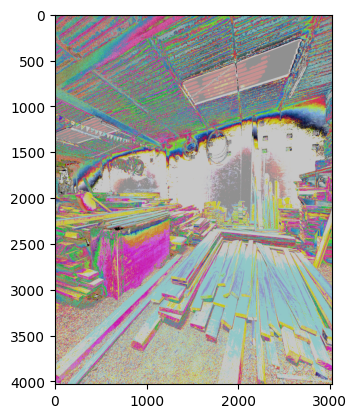

In [57]:
plt.imshow(img_new * 200)

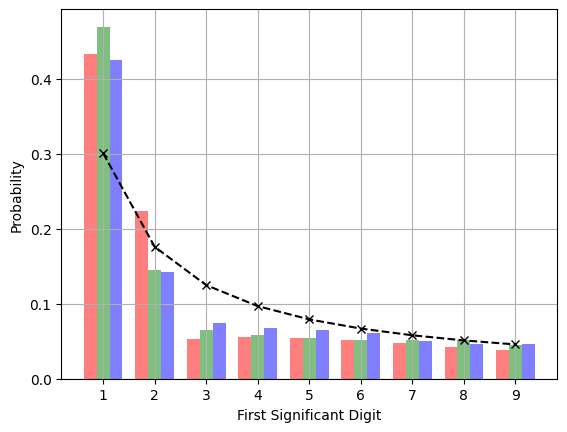

In [58]:
# Flatten the image 
img_flat = img_new.flatten()

# Split rgb channels
img_r = img_flat[0::3]
img_g = img_flat[1::3]
img_b = img_flat[2::3]

# Count the number of times each value appears
img_r_count = collections.Counter(img_r)
img_g_count = collections.Counter(img_g)
img_b_count = collections.Counter(img_b)

# Sort the counts
img_r_sorted = [ img_r_count[i] for i in range(10) ]
img_g_sorted = [ img_g_count[i] for i in range(10) ]
img_b_sorted = [ img_b_count[i] for i in range(10) ]

# Compute the probabilities 
img_r_prob = [ x / sum(img_r_sorted) for x in img_r_sorted ]
img_g_prob = [ x / sum(img_g_sorted) for x in img_g_sorted ]
img_b_prob = [ x / sum(img_b_sorted) for x in img_b_sorted ]

# Plot the probabilities
br_red = np.arange(1,10)
br_green = [x + 0.25 for x in br_red]
br_blue = [x + 0.25 for x in br_green]

plt.bar(br_red, img_r_prob[1:], color='r', alpha=0.5, width=0.25)
plt.bar(br_green, img_g_prob[1:], color='g', alpha=0.5, width=0.25)
plt.bar(br_blue, img_b_prob[1:], color='b', alpha=0.5, width=0.25)

plt.xlabel('First Significant Digit')
plt.ylabel('Probability')
plt.xticks([r + 0.25 for r in range(1,10)], [str(i) for i in range(1,10)])

plt.plot(br_green, [benford_prob(i) for i in range(1,10)], 'kx--')

plt.grid()
plt.show()


In [59]:
div_r = divergence(img_r_prob)
div_g = divergence(img_g_prob)
div_b = divergence(img_b_prob)

div_r, div_g, div_b

(0.028009065529210574, 0.035337988153320676, 0.02035469309929347)